## Configuracion inicial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
ruta = '../data/hotel_bookings.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=',', header=0)
df.shape

(119390, 32)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 1. Limpieza de datos con Python:

* Detección y eliminación de valores duplicados: 
Asegúrate de que cada registro en el dataset sea único.

In [4]:
# verificacion y conteo de valores duplicados
duplicados = df.duplicated().sum() # Cuenta el número total de registros duplicados en el DataFrame
df_sin_duplicados = df.drop_duplicates() # Crea un nuevo DataFrame sin duplicados
sin_duplicados=len(df_sin_duplicados) # Cuenta el número de registros únicos en el nuevo DataFrame
print(f"Número de registros duplicados: {duplicados} - sin duplicados: {sin_duplicados}") # Imprime los resultados
#df.head()

Número de registros duplicados: 31994 - sin duplicados: 87396


In [21]:
# reemplazamos  el df por df_sin_duplicados
df=df_sin_duplicados
len(df)

87396

In [6]:
df 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


* Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [7]:
# creo un dccionario para determinar los tipos de datos
diccionario = df.dtypes.to_dict()
print(diccionario) # muestro el conteido del diccionario


{'hotel': dtype('O'), 'is_canceled': dtype('int64'), 'lead_time': dtype('int64'), 'arrival_date_year': dtype('int64'), 'arrival_date_month': dtype('O'), 'arrival_date_week_number': dtype('int64'), 'arrival_date_day_of_month': dtype('int64'), 'stays_in_weekend_nights': dtype('int64'), 'stays_in_week_nights': dtype('int64'), 'adults': dtype('int64'), 'children': dtype('float64'), 'babies': dtype('int64'), 'meal': dtype('O'), 'country': dtype('O'), 'market_segment': dtype('O'), 'distribution_channel': dtype('O'), 'is_repeated_guest': dtype('int64'), 'previous_cancellations': dtype('int64'), 'previous_bookings_not_canceled': dtype('int64'), 'reserved_room_type': dtype('O'), 'assigned_room_type': dtype('O'), 'booking_changes': dtype('int64'), 'deposit_type': dtype('O'), 'agent': dtype('float64'), 'company': dtype('float64'), 'days_in_waiting_list': dtype('int64'), 'customer_type': dtype('O'), 'adr': dtype('float64'), 'required_car_parking_spaces': dtype('int64'), 'total_of_special_requests'

In [8]:
df.loc[df.adr<0,'adr']=0 # reemplazo todos los valores negativos de ingresos por dia(adr) a sero
df.loc[df.adr<0]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [9]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

* Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).

In [22]:
# Lista de columnas categóricas a revisar
columas_categoricas = ['hotel', 'country','deposit_type','customer_type','reservation_status', 'reserved_room_type','reservation_status','customer_type','deposit_type','assigned_room_type','reserved_room_type']
# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in columas_categoricas:  # ciclo para recorraer la lista
    valor_unico = df[col].dropna().unique().tolist()  # Eliminar NaN y convertir a lista
    valores_unicos[col] = valor_unico # Almacena los valores únicos en el diccionario bajo la clave de la columna
    print(f"\nValores únicos en la columna '{col}':") # muestro el encabezado de la columna
    print(valor_unico)  # por ultimo imprimo la lista


Valores únicos en la columna 'hotel':
['Resort Hotel', 'City Hotel']

Valores únicos en la columna 'country':
['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA', 


Valores únicos en la columna 'customer_type':
['Transient', 'Contract', 'Transient-Party', 'Group']

Valores únicos en la columna 'reservation_status':
['Check-Out', 'Canceled', 'No-Show']

Valores únicos en la columna 'reserved_room_type':
['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B']

Valores únicos en la columna 'reservation_status':
['Check-Out', 'Canceled', 'No-Show']

Valores únicos en la columna 'customer_type':
['Transient', 'Contract', 'Transient-Party', 'Group']

Valores únicos en la columna 'deposit_type':
['No Deposit', 'Refundable', 'Non Refund']

Valores únicos en la columna 'assigned_room_type':
['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K']

Valores únicos en la columna 'reserved_room_type':
['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B']


* Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.

In [30]:
# creamos una funcion para realizar la verificacion de datos nulos
def conteo_nan():
    col_sin_na=df.shape[0]-df.isnull().sum(axis=0) # obtenemos la suma de todas las columnas sin NaN en cada fila
    con_na=df.isnull().sum(axis=0)   # obtenemos la suma de todas las columnas con valores nulos
    porcentaje_na=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2) # obtenemos el porcentaje de valores nulos por columna
    aux= {'Datos sin NaNs': col_sin_na, 'NaN en q': con_na ,'NaN en %': porcentaje_na} # agregamos los datos obtenidos a un diccionario
    na=pd.DataFrame(data=aux) # creamos un dataframe con los datos del diccionario creado
    print(na.sort_values(by='NaN en %',ascending=False)) # mostramos ordenando por 'NaN en %' de forma descendente

In [31]:
conteo_nan() # llamamos a la funcion para realizar la verificacion de datos nulos

                                Datos sin NaNs  NaN en q  NaN en %
company                                   5259     82137     93.98
agent                                    75203     12193     13.95
hotel                                    87396         0      0.00
is_canceled                              87396         0      0.00
reservation_status                       87396         0      0.00
total_of_special_requests                87396         0      0.00
required_car_parking_spaces              87396         0      0.00
adr                                      87396         0      0.00
customer_type                            87396         0      0.00
days_in_waiting_list                     87396         0      0.00
deposit_type                             87396         0      0.00
booking_changes                          87396         0      0.00
assigned_room_type                       87396         0      0.00
reserved_room_type                       87396         0      

In [34]:
# Rellenar valores faltantes en columnas categóricas
for col in columas_categoricas: # recorremos toda la columna con el ciclo for
    df[col] = df[col].fillna('Desconocido') # reemplazamos los valores nulos de la columna con 'Desconocido'

In [35]:
conteo_nan() # llamamos a la funcion para realizar la verificacion de datos nulos

                                Datos sin NaNs  NaN en q  NaN en %
company                                   5259     82137     93.98
agent                                    75203     12193     13.95
hotel                                    87396         0      0.00
is_canceled                              87396         0      0.00
reservation_status                       87396         0      0.00
total_of_special_requests                87396         0      0.00
required_car_parking_spaces              87396         0      0.00
adr                                      87396         0      0.00
customer_type                            87396         0      0.00
days_in_waiting_list                     87396         0      0.00
deposit_type                             87396         0      0.00
booking_changes                          87396         0      0.00
assigned_room_type                       87396         0      0.00
reserved_room_type                       87396         0      

In [37]:
df['agent'].unique() # mostramos los valores unicos en la columna agent 

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [38]:
df['agent'] = df['agent'].fillna(0) # reemplazamos todos los Nas con 0 para la columna agent
df['agent'].unique() # verificamos

array([  0., 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [40]:
df['company'].unique() # verificamos valores unicos para la columna company

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [41]:
df['company'] = df['agent'].fillna(0) # rellenamos con cero los valores nulos de company
df['company'].unique() # verificamos que se haya reemplazado

array([  0., 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

* Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).

In [42]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,81.004657,0.749565,106.337319,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,109.945638,10.015731,55.013808,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,234.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


## 2. Exploración de datos con Python

* Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [43]:
# genero un a funcion para obtener una agrupación por año de operacion
def agrupar_datos(anho=2015):
    # Filtrar los datos por un año específico
    df_periodo = df[df['arrival_date_year'] == anho]

    # Agrupamo por mes y año, y calcular las métricas deseadas
    df_agrupado = (
        df_periodo.groupby(['arrival_date_year', 'arrival_date_month'])
        .agg({'children': 'sum', 'adr': 'mean', 'agent': 'count', 'company': 'count'})  # Cambiar a 'mean' para adr
        .reset_index()
    )

    # Crear la columna month_year para el orden
    df_agrupado['month_year'] = pd.to_datetime(df_agrupado['arrival_date_month'] + ' ' + df_agrupado['arrival_date_year'].astype(str))

    return df_agrupado.sort_values(by='month_year', ascending=True)  # Ordenar de forma ascendente por mes

In [44]:
# realizamos una prueba de la funcion 
agrupado = agrupar_datos(2015)
print(agrupado.head()) 
agrupado.info()

   arrival_date_year arrival_date_month  children         adr  agent  company  \
2               2015               July     264.0  112.399379   1674     1674   
0               2015             August     422.0  122.994391   2453     2453   
5               2015          September     181.0   99.878190   2839     2839   
4               2015            October     192.0   78.925463   2700     2700   
3               2015           November      68.0   59.236336   1665     1665   

  month_year  
2 2015-07-01  
0 2015-08-01  
5 2015-09-01  
4 2015-10-01  
3 2015-11-01  
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 2 to 1
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   arrival_date_year   6 non-null      int64         
 1   arrival_date_month  6 non-null      object        
 2   children            6 non-null      float64       
 3   adr                 6 non-null      float64

/tmp/ipykernel_9822/1382758796.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_agrupado['month_year'] = pd.to_datetime(df_agrupado['arrival_date_month'] + ' ' + df_agrupado['arrival_date_year'].astype(str))


/tmp/ipykernel_9822/1382758796.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_agrupado['month_year'] = pd.to_datetime(df_agrupado['arrival_date_month'] + ' ' + df_agrupado['arrival_date_year'].astype(str))


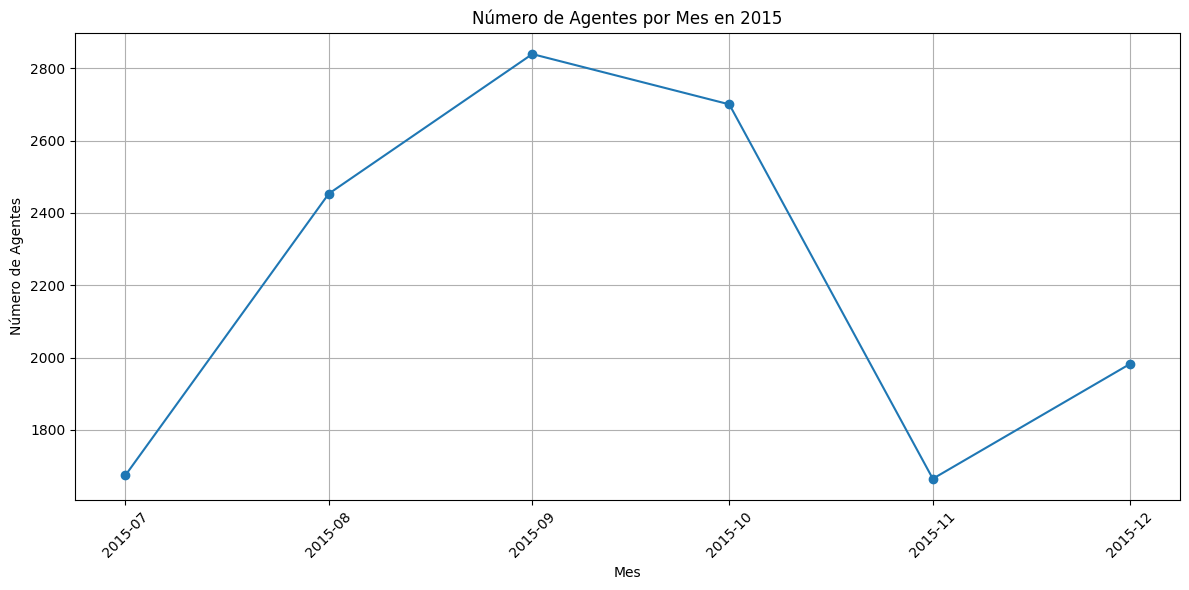

In [46]:
#  llamamos a la funcion para generar los datos arupados por año
agrupado = agrupar_datos(2015)
#agrupado.info()

plt.figure(figsize=(12, 6)) # creamos la figura con pyplot
plt.plot(agrupado['month_year'], agrupado['agent'], marker='o') # tomamos los datos para el grafico desde el dataframe generado
plt.title('Número de Agentes por Mes en 2015') # agregamos titulo al grafico
plt.xlabel('Mes') # titulo para el eje x
plt.ylabel('Número de Agentes')  # agregamos titulo para el eje y
plt.xticks(rotation=45) # agregamos rotacion de 45 grados a los titulos del eje x
plt.grid()  # especificamos que se debe mostrar cuadriculas
plt.tight_layout() # indicamos que se debe ajustar los paremetros del grafico
plt.show() # msotramos el grafico


/tmp/ipykernel_9822/1382758796.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_agrupado['month_year'] = pd.to_datetime(df_agrupado['arrival_date_month'] + ' ' + df_agrupado['arrival_date_year'].astype(str))


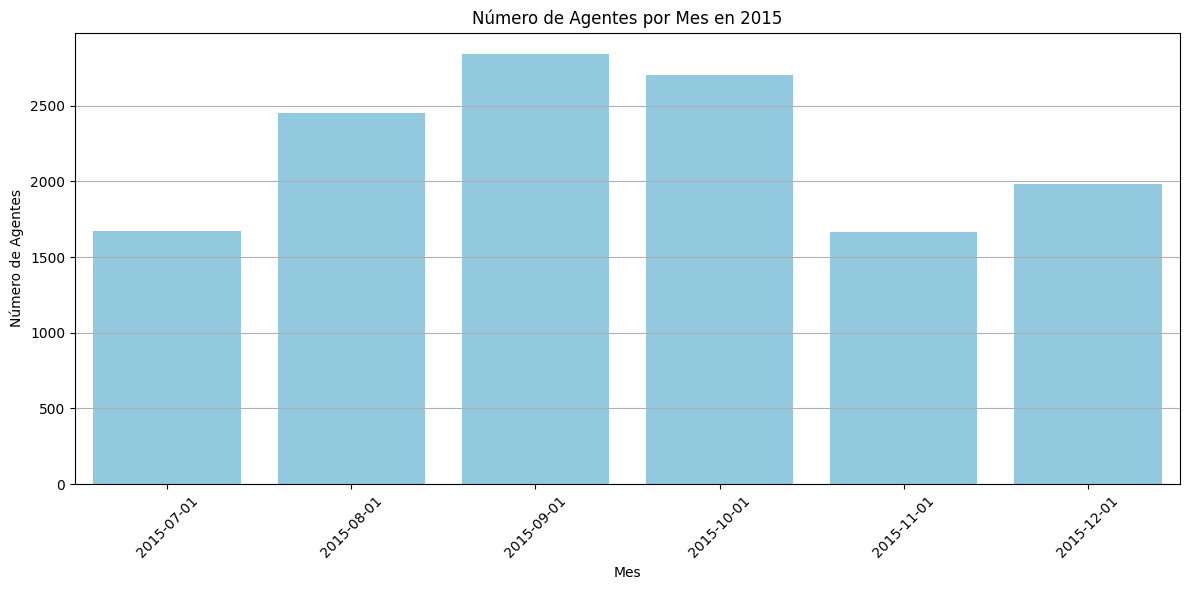

In [47]:
# obtenemos un dataframe llamando a la funcion 
agrupado = agrupar_datos(2015) 

# Creamos el gráfico de barras para el número de agentes por mes
plt.figure(figsize=(12, 6))
sns.barplot(x='month_year', y='agent', data=agrupado, color='skyblue')
plt.title('Número de Agentes por Mes en 2015') # titulo de grafico
plt.xlabel('Mes') # titulo del eje x
plt.ylabel('Número de Agentes') # titulo del eje y
plt.xticks(rotation=45) # aplicamos una rotacion al las etiquetas del eje x
plt.grid(axis='y')  # especificamos ue usaremos cuadricula pero con linas sobre el eje y
plt.tight_layout()  # indicamos que se debe ajustar los paremetros del grafico
plt.show() # msotramos el grafico

* Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

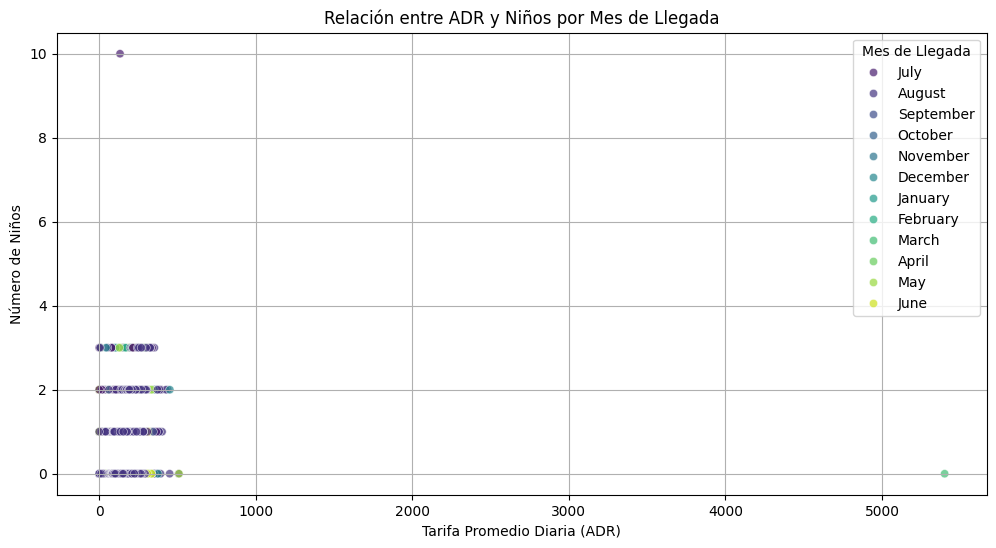

'\nInterprecación: \n\n    En este gráfico de dispersión, se observa cómo la tarifa promedio diaria (ADR) se relaciona con el número de niños que llegan. \n    Los colores indican el mes de llegada, lo que permite identificar patrones estacionales.\n\n'

In [48]:
# creamos una figura de tamaño 12 x 6
plt.figure(figsize=(12, 6))
# creamos un gráfico de dispersión utilizando Seaborn
sns.scatterplot(data=df, x='adr', y='children', hue='arrival_date_month', palette='viridis', alpha=0.7)
plt.title('Relación entre ADR y Niños por Mes de Llegada') # titulo del grafico
plt.xlabel('Tarifa Promedio Diaria (ADR)') # titulo del eje x
plt.ylabel('Número de Niños') # titulo del ejhe y
plt.legend(title='Mes de Llegada') # agreghamos titulo de leyenbdas
plt.grid() # indicamos que debe tener cuadricula
plt.show() # mostramos el grafico

'''
Interprecación: 

    En este gráfico de dispersión, se observa cómo la tarifa promedio diaria (ADR) se relaciona con el número de niños que llegan. 
    Los colores indican el mes de llegada, lo que permite identificar patrones estacionales.

'''

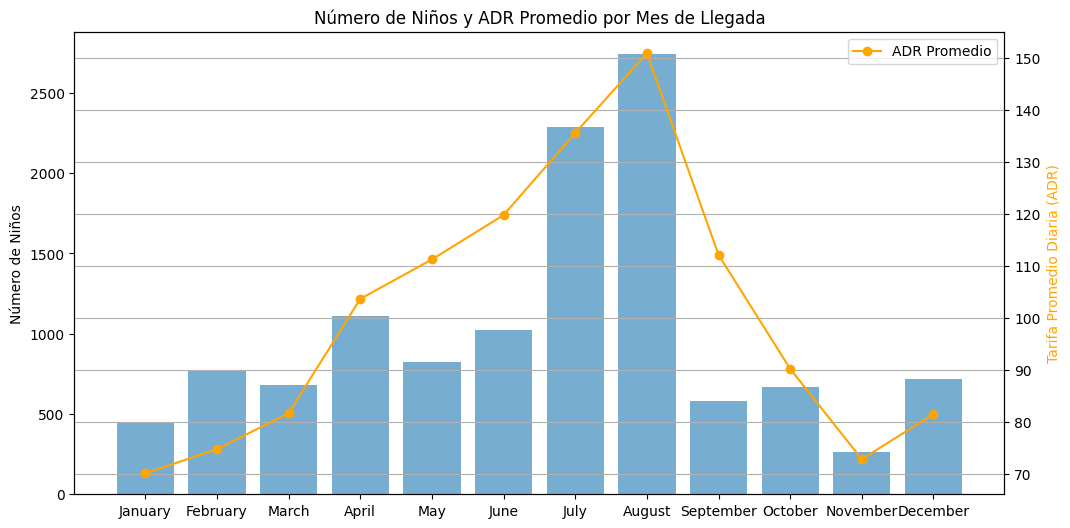

'\nInterpretación\n    Se puede notar que en meses con más llegadas de niños, la ADR también tiende a ser más alta, \n    lo que podría indicar que durante esos meses hay una mayor demanda y, por ello precios más altos.\n'

In [51]:
# creamos un df agrupado por rival_date_month, calculando la suma de niños y la media de ADR 
df_agrupado = df.groupby('arrival_date_month').agg({'children': 'sum', 'adr': 'mean'}).reset_index() 
# convertimos ei tipo de datos para ordenarlo
df_agrupado['month_number'] = pd.to_datetime(df_agrupado['arrival_date_month'], format='%B').dt.month
df_agrupado = df_agrupado.sort_values('month_number') # ordenamos por numero de mes

plt.figure(figsize=(12, 6)) # generamos una figura
# creamos un grafico de barras con los datos seleccioados arrival_date_month y children
plt.bar(df_agrupado['arrival_date_month'], df_agrupado['children'], label='Número de Niños', alpha=0.6)
plt.ylabel('Número de Niños') # agremamos la etiqueta para el eje y

# Creamos el segundo eje y para mostrar datos de adr (Tarifa Promedio Diaria )
ax2 = plt.gca().twinx() # Obtiene el eje actual y crea un eje Y secundario
# Le pasamos los parametros al grafico
ax2.plot(df_agrupado['arrival_date_month'], df_agrupado['adr'], color='orange', marker='o', label='ADR Promedio')
ax2.set_ylabel('Tarifa Promedio Diaria (ADR)', color='orange') # Agregamos la etiquera

plt.title('Número de Niños y ADR Promedio por Mes de Llegada') # titulo del grafico
plt.xticks(rotation=45) # configuramos rotacion  de las etiquetas del eje x
plt.grid()  # especificamos que se debe mostrar cuadricula
plt.legend(loc='upper left')    # defimmo la ubicacion de la leyenda del grafico
ax2.legend(loc='upper right') # definimos ubicacion de leyenda para  el segundo
plt.show() # mostramos el grafico


'''
Interpretación
    Se puede notar que en meses con más llegadas de niños, la ADR también tiende a ser más alta, 
    lo que podría indicar que durante esos meses hay una mayor demanda y, por ello precios más altos.
'''

## 3.  Análisis adicional:

* Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

In [52]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,81.004657,0.749565,106.337319,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,109.945638,10.015731,55.013808,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,234.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


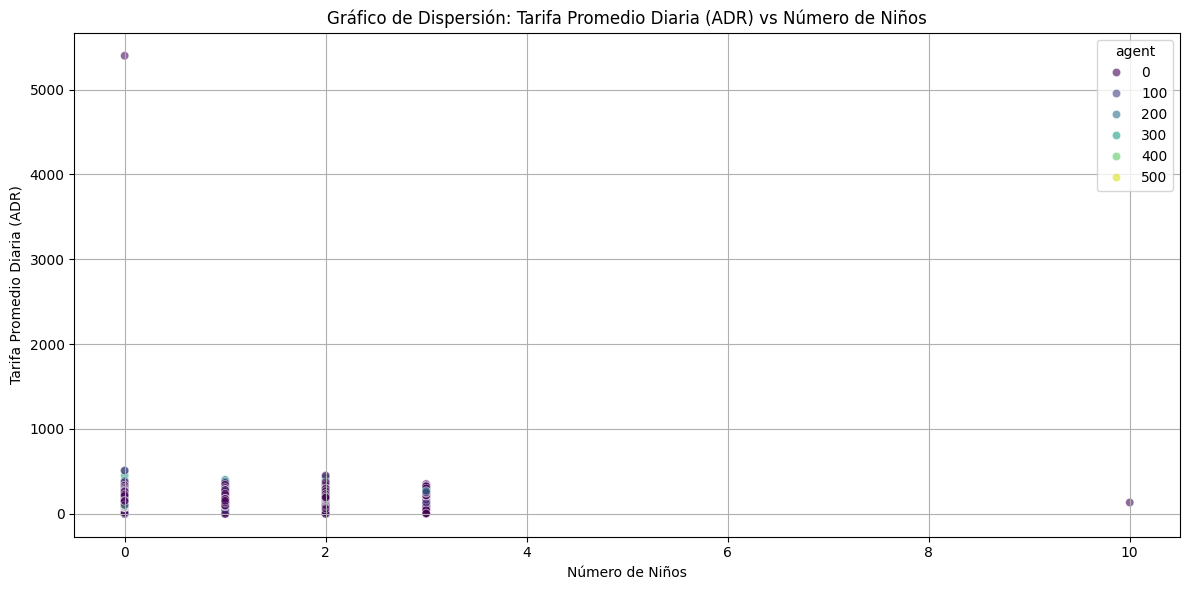

In [54]:
# creamos la figura de tamaño 12x6
plt.figure(figsize=(12, 6))
# Gráfico de dispersión: se puede graficar, por ejemplo, 'adr' vs 'children' (usamos seaborn)
sns.scatterplot(data=df, x='children', y='adr', hue='agent', alpha=0.6, palette='viridis')
plt.title('Gráfico de Dispersión: Tarifa Promedio Diaria (ADR) vs Número de Niños') # titulo del grafico
plt.xlabel('Número de Niños') # titulo del eje x
plt.ylabel('Tarifa Promedio Diaria (ADR)') # titulo del eje y
plt.grid() # indicamos qeu se mjestra la cuadricula
plt.tight_layout() # ajustamos los parametros del gráfico
plt.show() # mostramos el grafico resultante

* Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

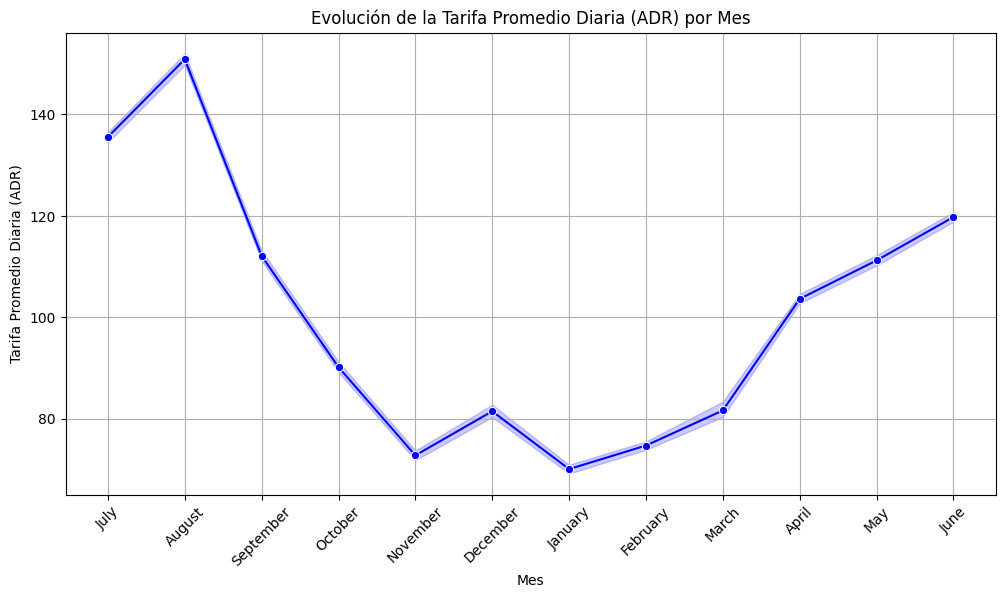

'\n    Se observa un aumento notable en la ADR desde enero hasta julio, alcanzando su punto máximo en agosto, \n    lo que indica que durante el verano (temporada alta), las tarifas son significativamente más altas. \n    Después de agosto, se observa una disminución de las tarifas en septiembre y octubre, \n    lo que sugiere una caída en la demanda después de la temporada alta de verano. \n    En los meses de noviembre y diciembre, las tarifas parecen estabilizarse, esto puede deberse a la poca demanda en esas fechas.\n    Se puede interpretar que en los meses entre junio y septiembre se registran las mayores tarifas diaras \n    debido a la alta demanda por situacion de estacioón.\n'

In [56]:
# creamos la figura  de 12x6
plt.figure(figsize=(12, 6))
# creamos el grafico con seabor para identificar tarifas por mes
sns.lineplot(data=df, x='arrival_date_month', y='adr', marker='o', color='blue')
plt.title('Evolución de la Tarifa Promedio Diaria (ADR) por Mes') # titulo para el grafico
plt.xlabel('Mes') # titul para el eje x
plt.ylabel('Tarifa Promedio Diaria (ADR)') # titulo para el eje y
plt.xticks(rotation=45) # rotacion para las etiquetas del eje x
plt.grid()  # indicamos que se muestra cuadricula en el grafico
plt.show() # msotramos el grafico

'''
    Se observa un aumento notable en la ADR desde enero hasta julio, alcanzando su punto máximo en agosto, 
    lo que indica que durante el verano (temporada alta), las tarifas son significativamente más altas. 
    Después de agosto, se observa una disminución de las tarifas en septiembre y octubre, 
    lo que sugiere una caída en la demanda después de la temporada alta de verano. 
    En los meses de noviembre y diciembre, las tarifas parecen estabilizarse, esto puede deberse a la poca demanda en esas fechas.
    Se puede interpretar que en los meses entre junio y septiembre se registran las mayores tarifas diaras 
    debido a la alta demanda por situacion de estacioón.
'''

/tmp/ipykernel_9822/1978669620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='children', y='adr', data=df, palette='Set2')


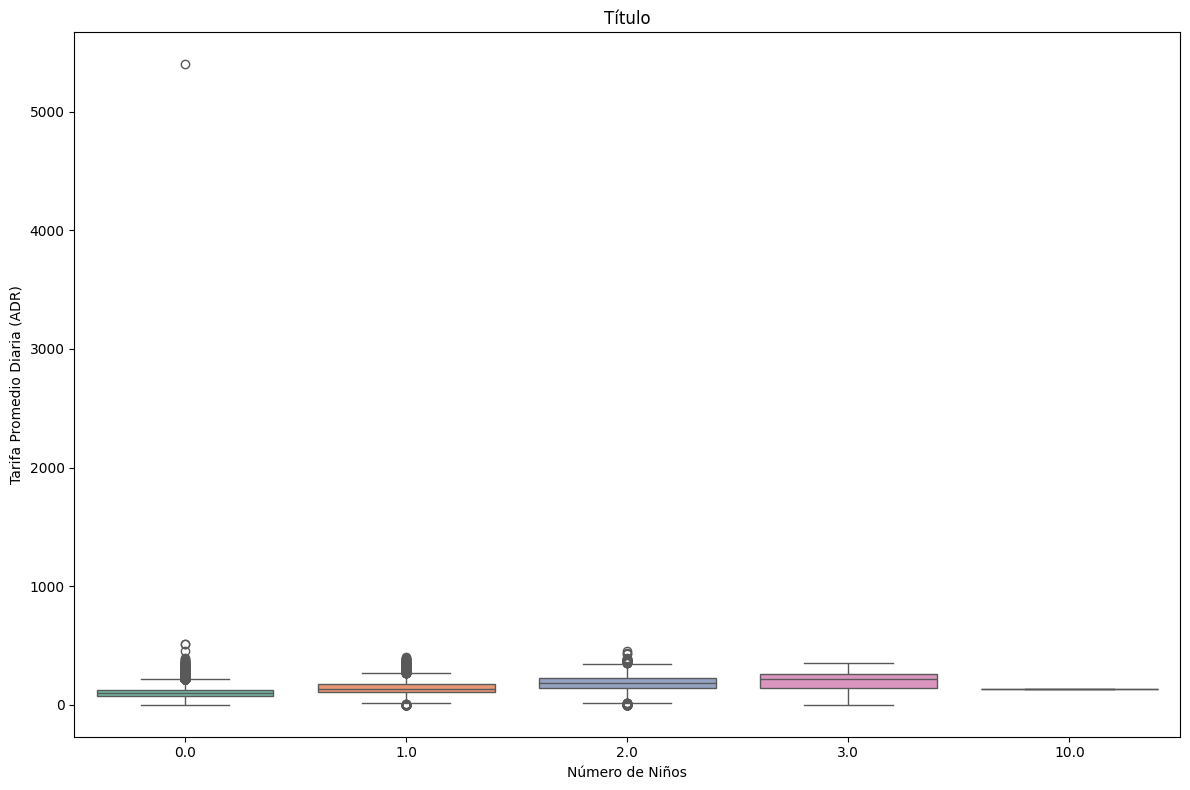

'\nInterpretación:\n    Las reservas que no incluyen niños tienen un rango de tarifas más bajo en comparación con los grupos que incluyen niños. \n    Esto indica que las familias que viajan con más niños tienden a reservar una gama más amplia de opciones de alojamiento,\n    que pueden incluir tarifas más altas.\n'

In [58]:
plt.figure(figsize=(12, 8))  # creamos la figura de tamao 12x8
# creamos el grafico con seaborn para determinar realcino de niñlos con tafiras por dia
sns.boxplot(x='children', y='adr', data=df, palette='Set2') 
plt.title('Título') # titulo del grafico
plt.xlabel('Número de Niños') # titulo del je x
plt.ylabel('Tarifa Promedio Diaria (ADR)') # titulo del eje y
plt.tight_layout() # ajuste del los parametros del grafico
plt.show() # mostramos el grafico

'''
Interpretación:
    Las reservas que no incluyen niños tienen un rango de tarifas más bajo en comparación con los grupos que incluyen niños. 
    Esto indica que las familias que viajan con más niños tienden a reservar una gama más amplia de opciones de alojamiento,
    que pueden incluir tarifas más altas.
'''

## Fuentes de consulta:
* ChatGpt: para establecer la forma correcta de generar funciones para reutilizar codigo
* https://es.stackoverflow.com/questions/140170/c%C3%B3mo-puedo-saber-cu%C3%A1les-son-las-filas-duplicadas-con-pandas
* https://www.codeauni.com/comunidad/blog/331